In [2]:
!pip install --quiet -r requirements.txt

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import oracledb

In [4]:
df_fraude = pd.read_csv('dados_fraude.csv')

In [5]:
df_fraude.head()

,id_alerta,motivo,tipo_fraude,data_alerta,status,id_solicitacao_pagamento,id_paciente,cpf_paciente,data_nascimento_paciente,telefone_paciente,...,razao_social_clinica,cnpj_clinica,telefone_clinica,id_procedimento,descricao_procedimento,valor_procedimento,id_solicitacao,data_solicitacao,valor_requerido,status_pagamento
0,1,NaN,Falsificação de documentos,NaN,NaN,NaN,66762.0,NaN,NaN,NaN,...,Ribeiro,NaN,NaN,1273.0,NaN,NaN,NaN,1982-01-15,NaN,NaN
1,2,Soluta quos non.,Uso indevido de plano,1980-01-10,Aberto,8886.0,48443.0,269.053.741-99,1947-11-28,(011) 4088 8235,...,Barbosa,36.452.978/0001-31,+55 51 8532 8098,1273.0,Placeat veniam temporibus tempore.,78.84,1693.0,1982-01-15,753.88,Pago
2,3,Amet molestias cupiditate.,Fraude não detectada,1985-04-04,Fechado,43047.0,53396.0,923.804.761-87,1955-07-01,+55 51 9372 8289,...,Barbosa,19.402.786/0001-00,+55 (041) 7014-9706,1393.0,Ea labore dolor.,5.44,8095.0,1976-04-29,965.56,Pago
3,4,Amet molestias cupiditate.,Uso indevido de plano,1985-06-28,Em análise,43047.0,53396.0,491.257.630-16,1958-09-25,(081) 5376-8386,...,Silveira,28.403.915/0001-67,41 6375 5110,1055.0,Dicta reiciendis cupiditate repudiandae.,45.33,12037.0,1981-09-02,224.35,Cancelado
4,5,Amet molestias cupiditate.,Procedimento não realizado,1997-07-15,Em análise,1400.0,5263.0,213.509.874-41,1948-01-20,51 2618 5344,...,Silva Ltda.,38.061.795/0001-10,+55 41 0932 4216,1635.0,Dolor in excepturi.,75.63,12788.0,1981-09-02,378.19,Pendente


In [6]:
df_fraude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_alerta                 100000 non-null  int64  
 1   motivo                    79449 non-null   object 
 2   tipo_fraude               100000 non-null  object 
 3   data_alerta               79449 non-null   object 
 4   status                    79449 non-null   object 
 5   id_solicitacao_pagamento  79449 non-null   float64
 6   id_paciente               100000 non-null  float64
 7   cpf_paciente              79449 non-null   object 
 8   data_nascimento_paciente  79449 non-null   object 
 9   telefone_paciente         79449 non-null   object 
 10  id_clinica                100000 non-null  float64
 11  razao_social_clinica      100000 non-null  object 
 12  cnpj_clinica              79449 non-null   object 
 13  telefone_clinica          79449 non-null   ob

In [7]:
df_fraude = df_fraude.dropna()

df_fraude.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79449 entries, 1 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_alerta                 79449 non-null  int64  
 1   motivo                    79449 non-null  object 
 2   tipo_fraude               79449 non-null  object 
 3   data_alerta               79449 non-null  object 
 4   status                    79449 non-null  object 
 5   id_solicitacao_pagamento  79449 non-null  float64
 6   id_paciente               79449 non-null  float64
 7   cpf_paciente              79449 non-null  object 
 8   data_nascimento_paciente  79449 non-null  object 
 9   telefone_paciente         79449 non-null  object 
 10  id_clinica                79449 non-null  float64
 11  razao_social_clinica      79449 non-null  object 
 12  cnpj_clinica              79449 non-null  object 
 13  telefone_clinica          79449 non-null  object 
 14  id_procedim

In [8]:
df_fraude.head()

,id_alerta,motivo,tipo_fraude,data_alerta,status,id_solicitacao_pagamento,id_paciente,cpf_paciente,data_nascimento_paciente,telefone_paciente,...,razao_social_clinica,cnpj_clinica,telefone_clinica,id_procedimento,descricao_procedimento,valor_procedimento,id_solicitacao,data_solicitacao,valor_requerido,status_pagamento
1,2,Soluta quos non.,Uso indevido de plano,1980-01-10,Aberto,8886.0,48443.0,269.053.741-99,1947-11-28,(011) 4088 8235,...,Barbosa,36.452.978/0001-31,+55 51 8532 8098,1273.0,Placeat veniam temporibus tempore.,78.84,1693.0,1982-01-15,753.88,Pago
2,3,Amet molestias cupiditate.,Fraude não detectada,1985-04-04,Fechado,43047.0,53396.0,923.804.761-87,1955-07-01,+55 51 9372 8289,...,Barbosa,19.402.786/0001-00,+55 (041) 7014-9706,1393.0,Ea labore dolor.,5.44,8095.0,1976-04-29,965.56,Pago
3,4,Amet molestias cupiditate.,Uso indevido de plano,1985-06-28,Em análise,43047.0,53396.0,491.257.630-16,1958-09-25,(081) 5376-8386,...,Silveira,28.403.915/0001-67,41 6375 5110,1055.0,Dicta reiciendis cupiditate repudiandae.,45.33,12037.0,1981-09-02,224.35,Cancelado
4,5,Amet molestias cupiditate.,Procedimento não realizado,1997-07-15,Em análise,1400.0,5263.0,213.509.874-41,1948-01-20,51 2618 5344,...,Silva Ltda.,38.061.795/0001-10,+55 41 0932 4216,1635.0,Dolor in excepturi.,75.63,12788.0,1981-09-02,378.19,Pendente
5,6,Numquam culpa sunt expedita recusandae eligend...,Conluio entre clínica e paciente,2013-06-20,Aberto,11961.0,17236.0,930.156.287-12,1917-04-18,51 2618 5344,...,Cardoso S/A,91.527.864/0001-11,(084) 8133-2191,908.0,Iure velit animi.,11.57,34753.0,1981-09-02,405.21,Pendente


In [9]:
df_fraude['Chances_Fraude'] = df_fraude['tipo_fraude'].apply(lambda x: 0 if x == "Fraude não detectada" else 1)

df_fraude.head()

,id_alerta,motivo,tipo_fraude,data_alerta,status,id_solicitacao_pagamento,id_paciente,cpf_paciente,data_nascimento_paciente,telefone_paciente,...,cnpj_clinica,telefone_clinica,id_procedimento,descricao_procedimento,valor_procedimento,id_solicitacao,data_solicitacao,valor_requerido,status_pagamento,Chances_Fraude
1,2,Soluta quos non.,Uso indevido de plano,1980-01-10,Aberto,8886.0,48443.0,269.053.741-99,1947-11-28,(011) 4088 8235,...,36.452.978/0001-31,+55 51 8532 8098,1273.0,Placeat veniam temporibus tempore.,78.84,1693.0,1982-01-15,753.88,Pago,1
2,3,Amet molestias cupiditate.,Fraude não detectada,1985-04-04,Fechado,43047.0,53396.0,923.804.761-87,1955-07-01,+55 51 9372 8289,...,19.402.786/0001-00,+55 (041) 7014-9706,1393.0,Ea labore dolor.,5.44,8095.0,1976-04-29,965.56,Pago,0
3,4,Amet molestias cupiditate.,Uso indevido de plano,1985-06-28,Em análise,43047.0,53396.0,491.257.630-16,1958-09-25,(081) 5376-8386,...,28.403.915/0001-67,41 6375 5110,1055.0,Dicta reiciendis cupiditate repudiandae.,45.33,12037.0,1981-09-02,224.35,Cancelado,1
4,5,Amet molestias cupiditate.,Procedimento não realizado,1997-07-15,Em análise,1400.0,5263.0,213.509.874-41,1948-01-20,51 2618 5344,...,38.061.795/0001-10,+55 41 0932 4216,1635.0,Dolor in excepturi.,75.63,12788.0,1981-09-02,378.19,Pendente,1
5,6,Numquam culpa sunt expedita recusandae eligend...,Conluio entre clínica e paciente,2013-06-20,Aberto,11961.0,17236.0,930.156.287-12,1917-04-18,51 2618 5344,...,91.527.864/0001-11,(084) 8133-2191,908.0,Iure velit animi.,11.57,34753.0,1981-09-02,405.21,Pendente,1


C:\Users\lucas\AppData\Local\Temp\ipykernel_8408\1994376938.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs['F'].set_xticklabels(contagem_fraudes.index, rotation=45, ha="right")


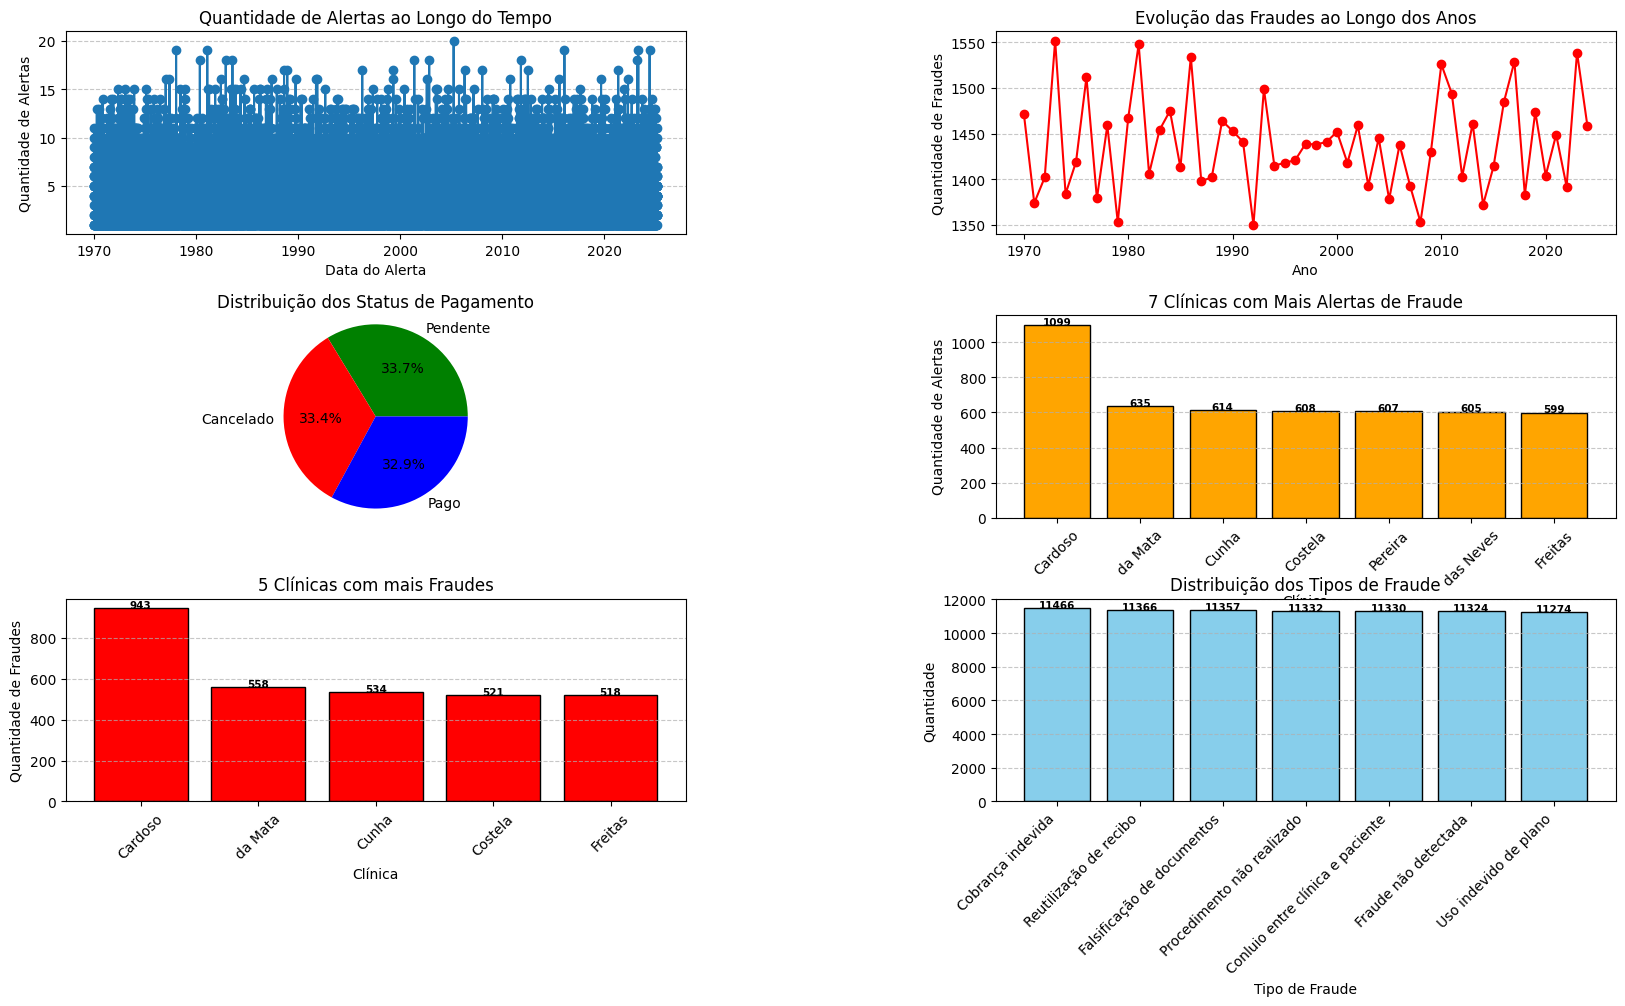

In [10]:
mosaico = "AB;CD;EF"
fig = plt.figure(figsize=(20, 10))
espacamento = {'wspace': 0.5, 'hspace': 0.4}
axs = fig.subplot_mosaic(mosaico, gridspec_kw=espacamento)

# Gráfico A
df_fraude["data_alerta"] = pd.to_datetime(df_fraude["data_alerta"])
alertas_por_data = df_fraude["data_alerta"].value_counts().sort_index()

axs['A'].plot(alertas_por_data.index, alertas_por_data.values, marker='o', linestyle='-')
axs['A'].set_xlabel("Data do Alerta")
axs['A'].set_ylabel("Quantidade de Alertas")
axs['A'].set_title("Quantidade de Alertas ao Longo do Tempo")
axs['A'].yaxis.grid(True, linestyle="--", alpha=0.7)

# Gráfico B
fraudes_por_ano = df_fraude.groupby(df_fraude["data_alerta"].dt.year).size()
fraudes_por_ano = fraudes_por_ano.iloc[:-1]

axs['B'].plot(fraudes_por_ano.index, fraudes_por_ano.values, marker='o', linestyle='-', color="red")
axs['B'].set_xlabel("Ano")
axs['B'].set_ylabel("Quantidade de Fraudes")
axs['B'].set_title("Evolução das Fraudes ao Longo dos Anos")
axs['B'].grid(axis="y", linestyle="--", alpha=0.7)

# Gráfico C
status_pagamento_counts = df_fraude["status_pagamento"].value_counts()
axs['C'].pie(status_pagamento_counts, labels=status_pagamento_counts.index, autopct="%1.1f%%", colors=["green", "red", "blue"])
axs['C'].set_title("Distribuição dos Status de Pagamento")
axs['C'].axis("equal")

# Gráfico D
top_clinicas = df_fraude["razao_social_clinica"].value_counts().nlargest(7)
axs['D'].bar(top_clinicas.index, top_clinicas.values, color="orange", edgecolor="black")

for i, v in enumerate(top_clinicas.values):
    axs['D'].text(i, v + 0.5, str(v), ha='center', fontsize=7.5, fontweight='bold')

axs['D'].set_xlabel("Clínica")
axs['D'].set_ylabel("Quantidade de Alertas")
axs['D'].set_title("7 Clínicas com Mais Alertas de Fraude")
axs['D'].tick_params(axis='x', rotation=45)
axs['D'].grid(axis="y", linestyle="--", alpha=0.7)

# Gráfico E
clinicas_fraudes = df_fraude[df_fraude['Chances_Fraude'] == 1]['razao_social_clinica'].value_counts().nlargest(5)
axs['E'].bar(clinicas_fraudes.index, clinicas_fraudes.values, color="red", edgecolor="black")

for i, v in enumerate(clinicas_fraudes.values):
    axs['E'].text(i, v + 0.5, str(v), ha='center', fontsize=7.5, fontweight='bold')

axs['E'].set_xlabel('Clínica')
axs['E'].set_ylabel('Quantidade de Fraudes')
axs['E'].set_title('5 Clínicas com mais Fraudes')
axs['E'].tick_params(axis='x', rotation=45)
axs['E'].grid(axis="y", linestyle='--', alpha=0.7)

# Gráfico F
contagem_fraudes = df_fraude["tipo_fraude"].value_counts()

axs['F'].bar(contagem_fraudes.index, contagem_fraudes.values, color="skyblue", edgecolor="black")

for i, v in enumerate(contagem_fraudes.values):
    axs['F'].text(i, v + 1, str(v), ha='center', fontsize=7.5, fontweight='bold')

axs['F'].set_xlabel("Tipo de Fraude")
axs['F'].set_ylabel("Quantidade")
axs['F'].set_title("Distribuição dos Tipos de Fraude")
axs['F'].set_xticklabels(contagem_fraudes.index, rotation=45, ha="right")
axs['F'].grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [11]:
df_fraude["id_paciente"].value_counts()

id_paciente
54050.0    15
36020.0    13
10985.0    11
27581.0    11
29342.0    10
           ..
34975.0     1
27349.0     1
30955.0     1
28820.0     1
23295.0     1
Name: count, Length: 42896, dtype: int64

In [12]:
contagem_alertas = df_fraude['id_paciente'].value_counts()

contagem_fraudes = df_fraude[df_fraude["Chances_Fraude"] == 1]['id_paciente'].value_counts()

df_fraude['Quantidade_alertas'] = df_fraude['id_paciente'].map(contagem_alertas)
df_fraude['Quantidade_fraudes'] = df_fraude['id_paciente'].map(contagem_fraudes).fillna(0).astype(int)

In [13]:
df_fraude.head()

,id_alerta,motivo,tipo_fraude,data_alerta,status,id_solicitacao_pagamento,id_paciente,cpf_paciente,data_nascimento_paciente,telefone_paciente,...,id_procedimento,descricao_procedimento,valor_procedimento,id_solicitacao,data_solicitacao,valor_requerido,status_pagamento,Chances_Fraude,Quantidade_alertas,Quantidade_fraudes
1,2,Soluta quos non.,Uso indevido de plano,1980-01-10,Aberto,8886.0,48443.0,269.053.741-99,1947-11-28,(011) 4088 8235,...,1273.0,Placeat veniam temporibus tempore.,78.84,1693.0,1982-01-15,753.88,Pago,1,2,2
2,3,Amet molestias cupiditate.,Fraude não detectada,1985-04-04,Fechado,43047.0,53396.0,923.804.761-87,1955-07-01,+55 51 9372 8289,...,1393.0,Ea labore dolor.,5.44,8095.0,1976-04-29,965.56,Pago,0,3,2
3,4,Amet molestias cupiditate.,Uso indevido de plano,1985-06-28,Em análise,43047.0,53396.0,491.257.630-16,1958-09-25,(081) 5376-8386,...,1055.0,Dicta reiciendis cupiditate repudiandae.,45.33,12037.0,1981-09-02,224.35,Cancelado,1,3,2
4,5,Amet molestias cupiditate.,Procedimento não realizado,1997-07-15,Em análise,1400.0,5263.0,213.509.874-41,1948-01-20,51 2618 5344,...,1635.0,Dolor in excepturi.,75.63,12788.0,1981-09-02,378.19,Pendente,1,3,2
5,6,Numquam culpa sunt expedita recusandae eligend...,Conluio entre clínica e paciente,2013-06-20,Aberto,11961.0,17236.0,930.156.287-12,1917-04-18,51 2618 5344,...,908.0,Iure velit animi.,11.57,34753.0,1981-09-02,405.21,Pendente,1,1,1


In [14]:
encoder = LabelEncoder()

df_fraude["status_pagamento_encoder"] = encoder.fit_transform(df_fraude["status_pagamento"])
df_fraude["status_encoder"] = encoder.fit_transform(df_fraude["status"])

In [15]:
df_fraude.head()

,id_alerta,motivo,tipo_fraude,data_alerta,status,id_solicitacao_pagamento,id_paciente,cpf_paciente,data_nascimento_paciente,telefone_paciente,...,valor_procedimento,id_solicitacao,data_solicitacao,valor_requerido,status_pagamento,Chances_Fraude,Quantidade_alertas,Quantidade_fraudes,status_pagamento_encoder,status_encoder
1,2,Soluta quos non.,Uso indevido de plano,1980-01-10,Aberto,8886.0,48443.0,269.053.741-99,1947-11-28,(011) 4088 8235,...,78.84,1693.0,1982-01-15,753.88,Pago,1,2,2,1,0
2,3,Amet molestias cupiditate.,Fraude não detectada,1985-04-04,Fechado,43047.0,53396.0,923.804.761-87,1955-07-01,+55 51 9372 8289,...,5.44,8095.0,1976-04-29,965.56,Pago,0,3,2,1,2
3,4,Amet molestias cupiditate.,Uso indevido de plano,1985-06-28,Em análise,43047.0,53396.0,491.257.630-16,1958-09-25,(081) 5376-8386,...,45.33,12037.0,1981-09-02,224.35,Cancelado,1,3,2,0,1
4,5,Amet molestias cupiditate.,Procedimento não realizado,1997-07-15,Em análise,1400.0,5263.0,213.509.874-41,1948-01-20,51 2618 5344,...,75.63,12788.0,1981-09-02,378.19,Pendente,1,3,2,2,1
5,6,Numquam culpa sunt expedita recusandae eligend...,Conluio entre clínica e paciente,2013-06-20,Aberto,11961.0,17236.0,930.156.287-12,1917-04-18,51 2618 5344,...,11.57,34753.0,1981-09-02,405.21,Pendente,1,1,1,2,0


In [16]:
df_fraude = df_fraude.drop(columns=[
    'id_alerta', 'motivo', 'tipo_fraude', 'data_alerta', 'status', 
    'id_solicitacao_pagamento', 'id_paciente', 'cpf_paciente', 
    'data_nascimento_paciente', 'telefone_paciente', 'descricao_procedimento', 
    'id_solicitacao', 'data_solicitacao', 'id_clinica', 'razao_social_clinica',
    'cnpj_clinica', 'telefone_clinica', 'id_procedimento', 'status_pagamento'
])



df_fraude.head()

,valor_procedimento,valor_requerido,Chances_Fraude,Quantidade_alertas,Quantidade_fraudes,status_pagamento_encoder,status_encoder
1,78.84,753.88,1,2,2,1,0
2,5.44,965.56,0,3,2,1,2
3,45.33,224.35,1,3,2,0,1
4,75.63,378.19,1,3,2,2,1
5,11.57,405.21,1,1,1,2,0


In [17]:
X = df_fraude.drop('Chances_Fraude', axis=1)
y = df_fraude['Chances_Fraude']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.20
)

In [18]:
modelo_fraude = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight={0: 2, 1: 1})
modelo_fraude.fit(X_train, y_train)

y_pred = modelo_fraude.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo: {:.2f}%".format(accuracy * 100))

print(classification_report(y_test, y_pred))

Acurácia do modelo: 90.40%
              precision    recall  f1-score   support

           0       0.68      0.63      0.65      2269
           1       0.94      0.95      0.94     13621

    accuracy                           0.90     15890
   macro avg       0.81      0.79      0.80     15890
weighted avg       0.90      0.90      0.90     15890



In [23]:

conn = oracledb.connect(user= "RM553745",
            password= "061004",
            host="oracle.fiap.com.br",
            port=1521,
            service_name="ORCL")

query = """
SELECT 
    af.ID_ALERTA, 
    af.MOTIVO, 
    af.TIPO_FRAUDE, 
    af.DATA_ALERTA, 
    af.STATUS, 
    af.SOLICITACAO_PAGAMENTO_ID, 
    p.ID AS ID_PACIENTE, 
    p.CPF AS CPF_PACIENTE, 
    p.DATA_NASCIMENTO AS DATA_NASCIMENTO_PACIENTE, 
    p.TELEFONE AS TELEFONE_PACIENTE, 
    c.RAZAO_SOCIAL AS RAZAO_SOCIAL_CLINICA, 
    c.CNPJ AS CNPJ_CLINICA, 
    c.TELEFONE AS TELEFONE_CLINICA, 
    pr.ID AS ID_PROCEDIMENTO, 
    pr.PROCEDIMENTO AS DESCRICAO_PROCEDIMENTO, 
    a.PRECO_ATENDIMENTO AS VALOR_PROCEDIMENTO, 
    sp.ID_SOLICITACAO, 
    sp.DATA_SOLICITACAO, 
    sp.VALOR_REQUERIDO, 
    sp.STATUS_PAGAMENTO AS STATUS_PAGAMENTO
FROM ODONTO_ALERTA_FRAUDE af
JOIN ODONTO_SOLICITACAO_PAGAMENTO sp ON af.SOLICITACAO_PAGAMENTO_ID = sp.ID_SOLICITACAO
JOIN ODONTO_AGENDAMENTO a ON sp.ID_SOLICITACAO = a.ID
JOIN ODONTO_PACIENTE p ON a.PACIENTE_ID = p.ID
JOIN ODONTO_CLINICAS c ON a.CLINICA_ID = c.ID
JOIN ODONTO_PROCEDIMENTO pr ON a.PROCEDIMENTO_ID = pr.ID
"""

df = pd.read_sql(query, conn)

conn.close()

print(df.head())

Empty DataFrame
Columns: [ID_ALERTA, MOTIVO, TIPO_FRAUDE, DATA_ALERTA, STATUS, SOLICITACAO_PAGAMENTO_ID, ID_PACIENTE, CPF_PACIENTE, DATA_NASCIMENTO_PACIENTE, TELEFONE_PACIENTE, RAZAO_SOCIAL_CLINICA, CNPJ_CLINICA, TELEFONE_CLINICA, ID_PROCEDIMENTO, DESCRICAO_PROCEDIMENTO, VALOR_PROCEDIMENTO, ID_SOLICITACAO, DATA_SOLICITACAO, VALOR_REQUERIDO, STATUS_PAGAMENTO]
Index: []


C:\Users\lucas\AppData\Local\Temp\ipykernel_8408\3176128249.py:37: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
